**Homework 5 Template**

Make a copy of this and save as "hw5_name.ipynb"

Name: Jamison Wolsborn

Comments for instructor:


In [200]:
#modules used, please load first
import numpy as np
from scipy.constants import epsilon_0
import matplotlib.pyplot as plt
from numpy.linalg import solve,eigh


**Exercise 5.21**

Suppose we have a distribution of charges and we want to calculate
the resulting electric field.  One way to do this is to first calculate the
electric potential $\phi$ and then take its gradient.  For a point
charge $q$ at the origin, the electric potential at a distance $r$ from the
origin is $\phi=q/4\pi\epsilon_0 r$ and the electric field is $\vec{E} =
-\nabla\phi$.

**a)** 
You have two charges, of $\pm1\,$C, $10\,$cm apart.  Calculate the
  resulting electric potential on a $1\,\textrm{m}\times1\,\textrm{m}$
  square plane surrounding the charges and passing through them.  Calculate
  the potential at $1\,$cm spaced points in a grid and make a
  visualization on the screen of the potential using a density plot.

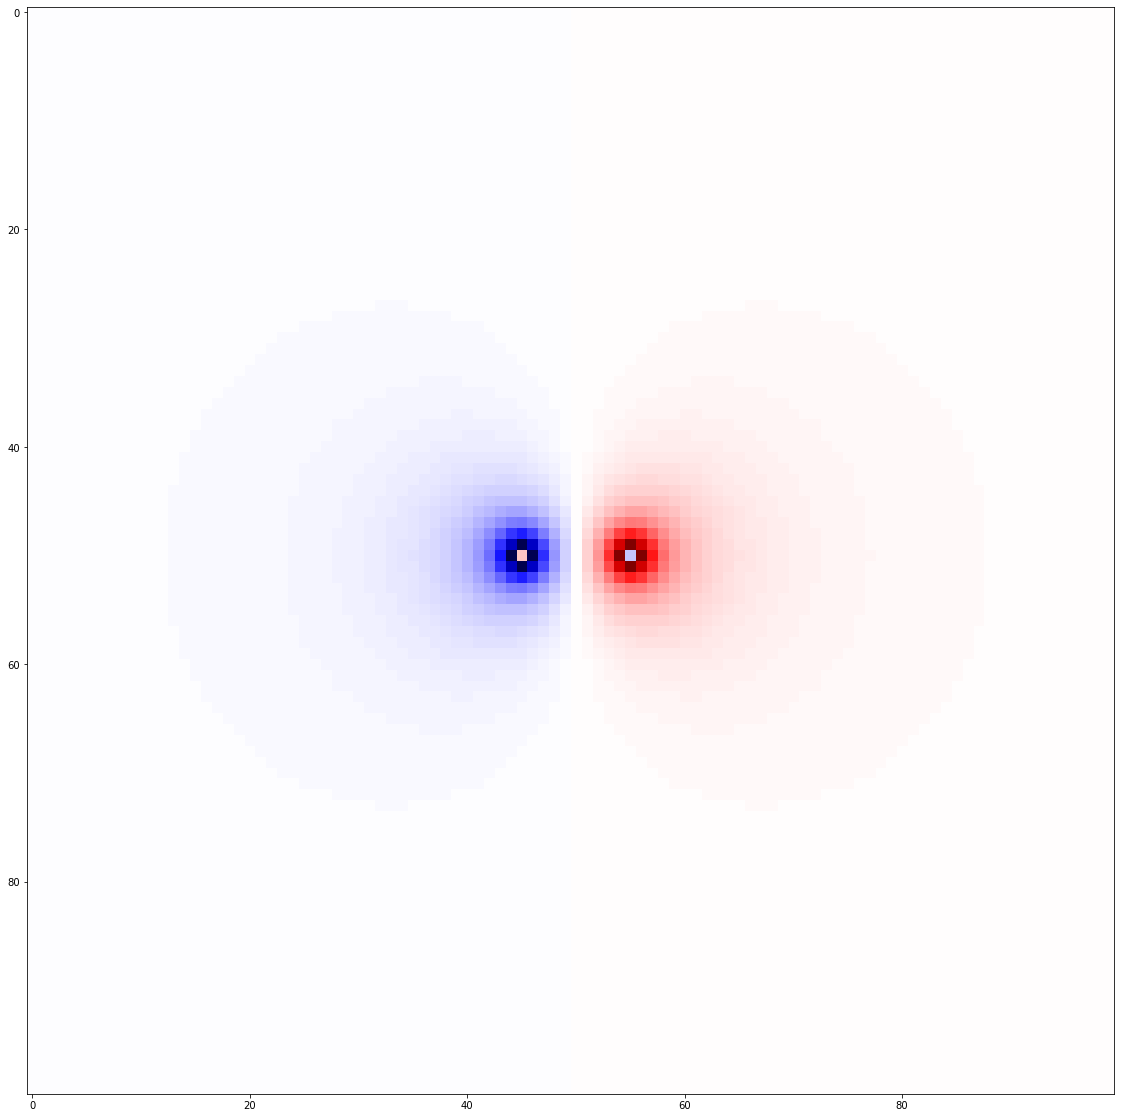

In [4]:
#This is modified code from lecture 4 on april 7th
# calculate the electric constant
k = 1/(4*np.pi*epsilon_0)

#Size of one side of the potential map, in pixels.
M = 100

#Size of one size of the potential map, in m.
length = 10

#calculate the length of each grid cell, m/cell
scale = length/M

# create an empty array to hold electric potential
V = np.zeros([M,M], float)

#create empty lists to hold point charge info
qs = np.array([-1, 1])
xs = np.array([45,55])
ys = np.array([50,50])


for i in range(M):
    for j in range(M):
        for n in range(len(qs)):
            r = scale*np.sqrt( (i-xs[n])**2 + (j-ys[n])**2)
            
            if r!=0:
                V[j,i] += k*qs[n]/r    

plt.figure(figsize=(20,20))
plt.imshow(V, cmap = 'seismic')

**Pts /10**

**b)** Now calculate the partial derivatives of the potential with respect
  to $x$ and $y$ and hence find the electric field in the $xy$ plane.  Make
  a visualization of the field also.  This is a little trickier than
  visualizing the potential, because the electric field has both magnitude
  and direction.  One way to do it might be to make two density plots, one
  for the magnitude, and one for the direction, the latter using the
  _"hsv"_ color scheme in _pylab_, which is a rainbow scheme
  that passes through all the colors but starts and ends with the same
  shade of red, which makes it suitable for representing things like
  directions or angles that go around the full circle and end up where they
  started.  A more sophisticated visualization might use the arrow
  object from the _vpython_ package, drawing a grid of arrows with
  direction and length chosen to represent the field. **Note: I will give up to 5 pts extra credit if you visualize your electric field using arrows.**  

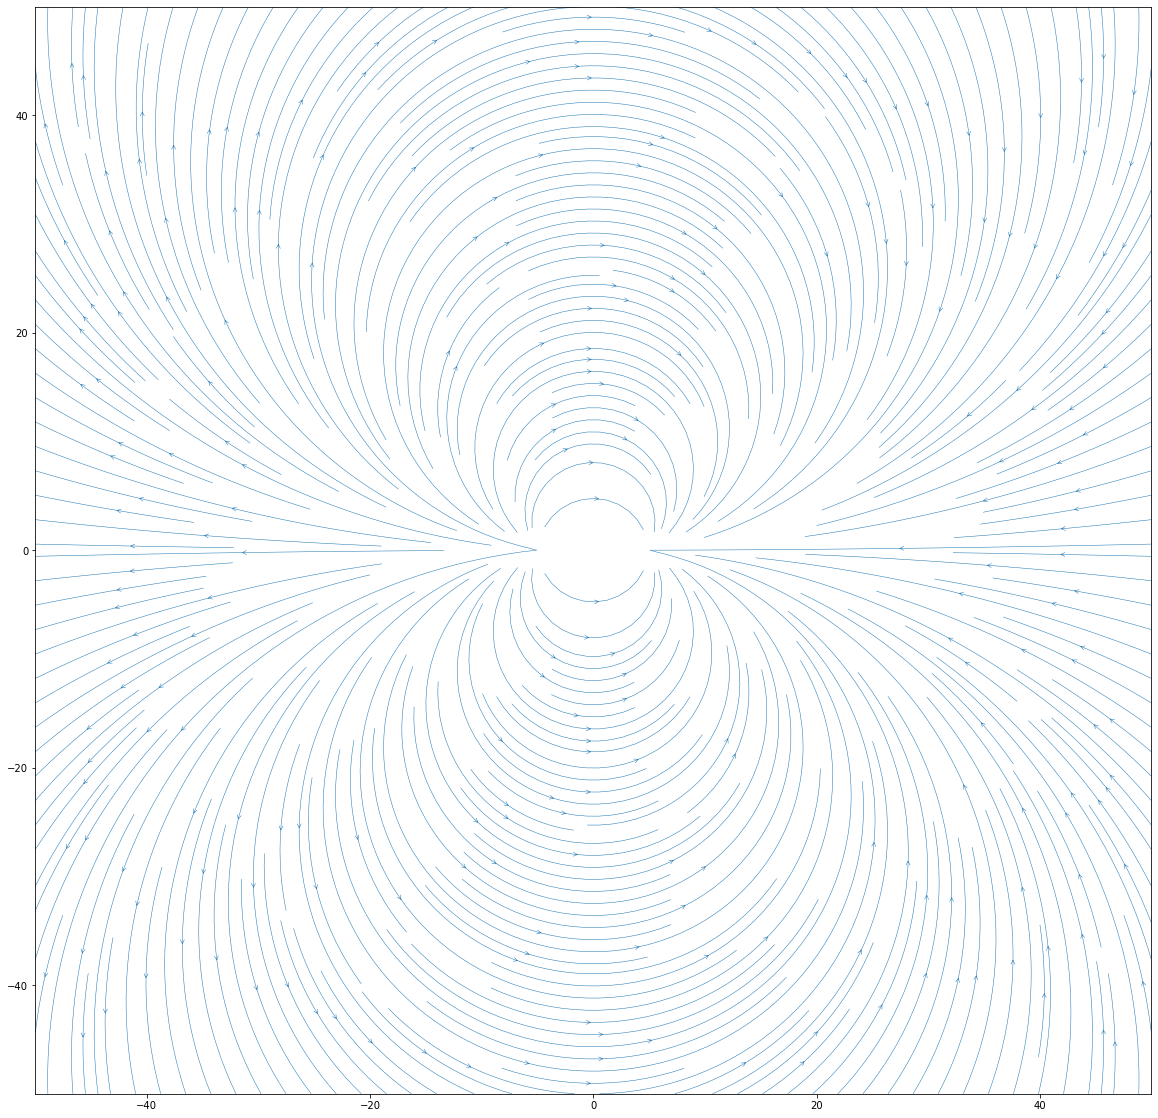

In [46]:
def E(q, r0, x, y):
    r_squared = (x-r0[0])**2 + (y-r0[1])**2
    return q * (x - r0[0]) / r_squared, q * (y - r0[1]) / r_squared

# Grid of x, y points
nx, ny = 100, 100
x = np.linspace(-50, 50, nx)
y = np.linspace(-50, 50, ny)
X, Y = np.meshgrid(x, y)

charges = [(-1, (5.0, 0.0)),(1, (-5.0, 0.0))]

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

plt.figure(figsize=(20,20))
plt.streamplot(x,y,Ex,Ey, linewidth = .5, density = 3, arrowstyle = '->')



**Pts /10**

**Total Exercise Pts /20**

**Exercise 6.1**

For this exercise, consult your textbook for a diagram of the circuit of resistors.

All the resistors have the same resistance $R$.  The power rail at the top
is at voltage $V_+=5\,$V.  What are the other four voltages, $V_1$
to $V_4$?

To answer this question we use Ohm's law and the Kirchhoff current
law, which says that the total net current flow out of (or into) any
junction in a circuit must be zero.  Thus for the junction at
voltage $V_1$, for instance, we have

\begin{equation*}
{V_1-V_2\over R} + {V_1-V_3\over R} + {V_1-V_4\over R} + {V_1-V_+\over R}
= 0,
\end{equation*}

or equivalently

\begin{equation*}
4V_1 - V_2 - V_3 - V_4 = V_+.
\end{equation*}

**a)** 
Write similar equations for the other three junctions with unknown
voltages.

$$ 3V_2 - V_1 - V_4 = V_0 $$

$$ 3V_3 - V_1 - V_4 = V_+ $$ 

$$ 4V_4 - V_1 - V_2 - V_3 = V_0 $$

**Pts /5**

**b)** Write a program to solve the four resulting equations using Gaussian
  elimination with backsubstitution and hence find the four voltages (or you can modify a program
  you already have, such as the program _gausselim.py_ in
  Example 6.1).

In [6]:
#Array of system of equations
A = np.array([[4, -1, -1, -1],
              [-1, 3, 0, -1],
              [-1, 0 , 3, -1],
              [-1, -1, -1, 4]], float)
#voltage values
v = np.array([5, 0, 5, 0], float)
N = len(v)

#Gaussian Elimination
for m in range(N):
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    #Now subtract from the lower rows
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
        
#Backsubstitution
x = np.empty(N,float)
for m in range(N -1, -1, -1):
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m,i]*x[i]

print(x)

[3.         1.66666667 3.33333333 2.        ]


**Pts /5**

**Total Exercise Pts /10**

**Exercise 6.2**

**a)** Modify the program _gausselim.py_ in Example 6.1 to incorporate
  partial pivoting (or you can write your own program from scratch if you
  prefer).  Run your program and demonstrate that it gives the same answers
  as the original program when applied to Eq. (6.1)

In [9]:
#Array of system of equations
A = np.array([[4, -1, -1, -1],
              [-1, 3, 0, -1],
              [-1, 0 , 3, -1],
              [-1, -1, -1, 4]], float)
#voltage values
v = np.array([5, 0, 5, 0], float)
N = len(v)

#Gaussian Elimination
for m in range(N):
    
    for j in range(m+1, N):
        if A[m,m] < A[j,m]:
            A[[m,j],:] = A[[j,m],:]
            v[[m,j]] = v[[j,m]]
    
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    #Now subtract from the lower rows
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
        
#Backsubstitution
x = np.empty(N,float)
for m in range(N -1, -1, -1):
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m,i]*x[i]

print(x)

[3.         1.66666667 3.33333333 2.        ]


**Pts /5**

**b)** Modify the program to solve the equations in (6.17) and show that it
  can find the solution to these as well, even though Gaussian elimination
  without pivoting fails.

In [69]:
#Array of system of equations
A = np.array([[0, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4 , 1, 5],
              [2, -2, 1, 3]], float)
#voltage values
v = np.array([-4, 3, 9, 7], float)
N = len(v)

#Gaussian Elimination
for m in range(N):
    
    #partial pivoting function rearranges the rows so that the greatest value is at the top
    #this ensures that the diagonal is always greater than zero
    for j in range(m+1, N): 
        if A[m,m] < A[j,m]: #if value on diagonal is less than the value below it
            A[[m,j],:] = A[[j,m],:] #swap out the 2 rows of A with the greater value rows
            v[[m,j]] = v[[j,m]] #swap out the 2 rows of v with the greater value rows
    
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    #Now subtract from the lower rows
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

#Backsubstitution
x = np.empty(N,float)
for m in range(N -1, -1, -1):
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m,i]*x[i]

print(x)

[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


**Pts /5**

**Total Exercise Pts /10**

**Exercise 6.3**

This exercise invites you to write your own
program to solve simultaneous equations using the method of LU
decomposition.

**a)** Starting, if you wish, with the program for Gaussian elimination in
  Example 6.1 on page 218, write a Python function that calculates the LU
  decomposition of a matrix.  The calculation is same as that for Gaussian
  elimination, except that at each step of the calculation you need to
  extract the appropriate elements of the matrix and assemble them to form
  the lower diagonal matrix __L__ of Eq. (6.32).  Test your function by
  calculating the LU decomposition of the matrix from Eq. (6.2), then
  multiplying the __L__ and __U__ you get and verifying that you
  recover the original matrix once more.

In [131]:
#Array of system of equations
A = np.array([[2,1,4,1],
              [3,4,-1,-1],
              [1,-4,1,5],
              [2,-2,1,3]], float)
#voltage values
v = np.array([-4,3,9,7], float)


def LU(A):
    
    N = len(A)
    
    L = np.identity(N)
    U = A.copy()
    #Gaussian Elimination
    for m in range(N):
        
        #partial pivoting
        for j in range(m+1, N):
            if A[m,m] < A[j,m]:
                A[[m,j],:] = A[[j,m],:]
        
        #division
        for i in range(m+1, N):
            A[i,m] = A[i,m]/A[m,m]
        
        #subtraction
        for j in range(m+1, N):
            for i in range(m+1, N):
                A[i,j] -= A[i,m]*A[m,j]
               
    U = A.copy()
    #converting A into U matrix
    for k in range(N-1):
        U[k+1:,k] = 0
    
    #converting A into L matrix
    for h in range(1,N):
        for s in range(h):
            L[h,s] = A[h,s]
    
    #matrix multiplication
    A = np.dot(L,U)
    
    print("U = ", U)
    print("L = ", L)
    print("A = ", A)
    return U,L,A

LU(A)


U =  [[  3.           4.          -1.          -1.        ]
 [  0.          -1.66666667   4.66666667   1.66666667]
 [  0.           0.         -11.4         -1.        ]
 [  0.           0.           0.           1.19298246]]
L =  [[1.         0.         0.         0.        ]
 [0.66666667 1.         0.         0.        ]
 [0.66666667 2.8        1.         0.        ]
 [0.33333333 3.2        1.19298246 1.        ]]
A =  [[ 3.  4. -1. -1.]
 [ 2.  1.  4.  1.]
 [ 2. -2.  1.  3.]
 [ 1. -4.  1.  5.]]


(array([[  3.        ,   4.        ,  -1.        ,  -1.        ],
        [  0.        ,  -1.66666667,   4.66666667,   1.66666667],
        [  0.        ,   0.        , -11.4       ,  -1.        ],
        [  0.        ,   0.        ,   0.        ,   1.19298246]]),
 array([[1.        , 0.        , 0.        , 0.        ],
        [0.66666667, 1.        , 0.        , 0.        ],
        [0.66666667, 2.8       , 1.        , 0.        ],
        [0.33333333, 3.2       , 1.19298246, 1.        ]]),
 array([[ 3.,  4., -1., -1.],
        [ 2.,  1.,  4.,  1.],
        [ 2., -2.,  1.,  3.],
        [ 1., -4.,  1.,  5.]]))

**Pts /10**

**b)** Build on your LU decomposition function to create a complete program
  to solve Eq. (6.2) by performing a double substitution as described
  in this section. 

In [142]:
#Array of system of equations
A = np.array([[2,1,4,1],
              [3,4,-1,-1],
              [1,-4,1,5],
              [2,-2,1,3]], float)
#voltage values
v = np.array([-4,3,9,7], float)


def LU(A,v):
    
    N = len(A)
    
    L = np.identity(N)
    U = np.copy(A)
    
    #Gaussian Elimination
    for m in range(N):
        
        #partial pivoting
        for j in range(m+1, N):
            if A[m,m] < A[j,m]:
                A[[m,j],:] = A[[j,m],:]
        
        #division
        for i in range(m+1, N):
            A[i,m] = A[i,m]/A[m,m]
        
        #subtraction
        for j in range(m+1, N):
            for i in range(m+1, N):
                A[i,j] -= A[i,m]*A[m,j]
               
    
    #converting A into U matrix
    for k in range(N-1):
        U[k+1:,k] = 0
    
    #converting A into L matrix
    for h in range(1,N):
        for s in range(h):
            L[h,s] = A[h,s]
    
    #matrix multiplication
    A = np.dot(L,U)
    
    #Backsubstitution
    x = np.empty(N,float)
    for m in range(N -1, -1, -1):
        x[m] = v[m]
        for i in range(m+1, N):
            x[m] -= L[m,i]*x[i]
    
    y = np.empty(N,float)
    for m in range(N-1, -1, -1):
        y[m] = x[m]
        for i in range(m+1, N):
            y[m] -= U[m,i]*y[i]
    
    
    return y

LU(A,v)
#something is wrong with my back substitution, I get the last one right though

array([109., -16., -26.,   7.])

**Pts /10**

**c)**  Solve the same equations using the function _solve_ from the _numpy_ package and verify that you get the same answer either way.

In [68]:
y = solve(A,v)
print(y)

[-43.5122807   33.48070175   8.38596491   7.        ]


**Pts /5**

**Total Exercise Pts /25**

**Exercise 6.8**

In this exercise you'll write a
program to calculate the eigenvalues and eigenvectors of a real symmetric
matrix using the QR algorithm.  The first challenge is to write a program
that finds the QR decomposition of a matrix.  Then we'll use that
decomposition to find the eigenvalues.

Refer to the question in your textbook for the complete details to this exercise.

**b)** Write a Python function that takes as its argument a real square
  matrix __A__ and returns the two matrices __Q__ and __R__
  that form its QR decomposition.  As a test case, try out your function on
  the matrix listed in this problem description from your textbook. 
  
  Check the results by multiplying __Q__ and __R__ together to
recover the original matrix __A__ again. You can use the numpy function dot() to perform matrix multiplication. 

In [188]:

A = np.array([[1,4,8,4],
             [4,2,3,7],
             [8,3,6,9],
             [4,7,9,2]],float)

def QR(A):
    
    N = len(A)
    Q = np.zeros([N,N], float)
    R = np.zeros([N,N], float)
    
    Acol = []
    for i in range(N):
        Acol.append(A[:,i]) #break each column into its own list
    
    Acol_real = np.copy(Acol) #somewhere in my code Acol is being overwritten so I made a copy
    
    Ucol = [np.copy(Acol[0])] #initialize U columns
    Qcol = [np.copy(Acol[0]) / np.sqrt(np.dot(Acol[0], Acol[0]))] #initialize Q columns
    
    for i in range(1,N): 
        Ucol.append(Acol[i]) #first part of the equation for solving for U columns
        for j in range(i):
            Ucol[i] -= np.dot(Qcol[j], Acol[i])*Qcol[j] #The rest of the U column values
        Qcol.append(Ucol[i] / np.sqrt(np.dot(Ucol[i], Ucol[i]))) #Q columns are U vectors over U length
    
    #construct Q matrix
    for i in range(N):
        Q[:,i] = Qcol[i] #basically what we did for Acol but in reverse
        
    #construct R matrix
    for i in range(N):
        for j in range(i,N):
            if i == j: #if it on a diagonal then do the length of U column
                R[i,i] = np.sqrt(np.dot(Ucol[i], Ucol[i])) #take length if on the diagonal
            else:
                R[i,j] = np.dot(Qcol[i], Acol_real[j]) #take dot product if in upper triangle
    
    A = np.dot(Q,R) #recalculate A
    
    return [Q,R,A]

QR(A)

[array([[ 0.10153462,  0.558463  ,  0.80981107,  0.1483773 ],
        [ 0.40613847, -0.10686638, -0.14147555,  0.8964462 ],
        [ 0.81227693, -0.38092692,  0.22995024, -0.37712564],
        [ 0.40613847,  0.72910447, -0.5208777 , -0.17928924]]),
 array([[ 9.8488578 ,  6.49821546, 10.55960012, 11.37187705],
        [ 0.        ,  5.98106979,  8.4234836 , -0.484346  ],
        [ 0.        ,  0.        ,  2.74586406,  3.27671222],
        [ 0.        ,  0.        ,  0.        ,  3.11592335]]),
 array([[1., 4., 8., 4.],
        [4., 2., 3., 7.],
        [8., 3., 6., 9.],
        [4., 7., 9., 2.]])]

**Pts /10**

**c)** Using your function, write a complete program to calculate the
  eigenvalues and eigenvectors of a real symmetric matrix using the QR
  algorithm.  Continue the calculation until the magnitude of every
  off-diagonal element of the matrix is smaller than $10^{-6}$.  Test your
  program on the example matrix above.  You should find that the
  eigenvalues are $1$, $21$, $-3$, and$-8$. Out the eigenvectors and eigenvalues.

In [239]:
A = np.array([[1,4,8,4],
             [4,2,3,7],
             [8,3,6,9],
             [4,7,9,2]],float)
Acopy = np.copy(A)
error = 1e-6
measured_error = 1
N = len(A)
#calculates the biggest number that is not a diagonal
def greatest_error(A):
    gerror = 0.
    N = len(A)
    #iterate through each matrix value
    for i in range(N):
        for j in range(N):
            if i == j: #if it is on a diagonal, do nothing
                pass
            else: 
                if A[i,j] > gerror: #if it is greater than the previous error then update it
                    gerror = A[i,j]
    return gerror

V = np.identity(N)               
while greatest_error(A) > error: #while the greatest non-diagonal number is greater than the error
    A = np.dot(QR(A)[1], QR(A)[0]) #take dot product of R and Q
    V = np.dot(V, QR(Acopy)[0])
    
Eigenvalues = []
for i in range(N):
    for j in range(N):
        if i == j:
            Eigenvalues.append(A[i,i])



            
print(Eigenvalues)
print(V) #I don't get the correct values for V

[20.999999999999982, -7.999999999999982, -3.0000000000000013, 0.9999999999999992]
[[ 0.05103915  0.34068235  0.8028248  -0.48662397]
 [ 0.33795165 -0.09557891  0.49920658  0.79211498]
 [ 0.3383761  -0.86673668  0.14138445 -0.33805263]
 [ 0.876747    0.35152203 -0.29372704 -0.14653116]]


**Pts /10**

**d)** Verify that your eigenvalues and eigenvectors satisfy the eigenvector equation:

$
\mathbf{A}{v}=\lambda\mathbf{v}
$

In [237]:
A = np.array([[1,4,8,4],
             [4,2,3,7],
             [8,3,6,9],
             [4,7,9,2]],float)

print(np.dot(A,V))


[[ 7.61684252 -5.56943861  2.75581857 -0.60870974]
 [ 8.03241721  1.03201574  2.57777644 -2.40214195]
 [11.34314775  0.40200024  6.12498148 -4.86374307]
 [ 7.36869701 -6.40390905  7.39075122  0.26277299]]
[[  1.07182217   7.15432925  16.85932075 -10.21910338]
 [  7.09698457  -2.00715714  10.48333817  16.63441466]
 [  7.10589804 -18.20147028   2.96907345  -7.09910526]
 [ 18.41168706   7.38196267  -6.16826778  -3.07715443]]


**Pts /5**

**e)** Verify  your eigenvectors and eigenvalues using the  numpy.linalg function eigh().

In [202]:
A = np.array([[1,4,8,4],
             [4,2,3,7],
             [8,3,6,9],
             [4,7,9,2]],float)
l,v = eigh(A)
print("eigenvalues of A are: ", l)
print("eigenvectors of A are: ",v)

eigenvalues of A are:  [-8. -3.  1. 21.]
eigenvectors of A are:  [[-0.38357064 -0.77459667  0.25819889 -0.43151697]
 [ 0.43151697 -0.25819889 -0.77459667 -0.38357064]
 [ 0.52740963  0.25819889  0.51639778 -0.62330229]
 [-0.62330229  0.51639778 -0.25819889 -0.52740963]]


**Pts /5**

**Total Exercise Pts /30**

**Total Pts /95**